# 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

%matplotlib inline

# 2.0 EDA

## 2.1 Generate Data

In [15]:
def get_dataset(argument = "None"):
    
    x = np.linspace(-1, 1, num=30000)
    
    y = 0.2 * np.power(x, 4) + 2 * np.power(x, 3) + 0.1 * np.power(x, 2) + 10
    
    data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    
    if argument == "shuffle":
        
        print("shuffling\n")
        
        np.random.seed(481999)
        
        np.random.shuffle(data)
        
        return data
    
    else:
        
        return data

## 2.2 Split Data

In [16]:
def split_data(data, train_ratio, validation_ratio, test_ratio):
    
    train_length = int ( len(data) * train_ratio )
    
    validation_length = int ( len(data) * validation_ratio )
    
    test_length = int ( len(data) * test_ratio )
    
    x_train = data[:train_length,0] 
    y_train = data[:train_length,1]
    x_validation = data[train_length:train_length+validation_length,0]
    y_validation = data[train_length:train_length+validation_length,1]
    x_test = data[train_length+validation_length:train_length+validation_length+test_length,0]
    y_test = data[train_length+validation_length:train_length+validation_length+test_length,1]
    
    return x_train, y_train, x_validation, y_validation, x_test, y_test   

## 2.3 Normalize Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    
    data = data.reshape(-1, 1)
    
    scaler = MinMaxScaler()
    
    data = scaler.fit_transform(data)
    
    return data

## 2.4 Evaluate Data

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_predict):
    
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict, squared= False)
    r2 = r2_score(y_test, y_predict)
    
    return mae, mse, rmse, r2

## 2.5 Plotter

In [19]:
def graph_plotter (x , y, plot_type = "true"):
    
    plt.figure(figsize = (10,6))
    
    if plot_type == "true":
        
        plt.scatter(x, y, s=0.5, c = "blue")
        plt.title("x_test vs y_test", fontsize = 18)
        plt.xlabel ( "x_test", fontsize= 15 )
        plt.ylabel( "y_test", fontsize = 15 )
    
    elif plot_type == "predict":
        
        plt.scatter(x, y, s=0.5, c = "red")
        plt.title("x_test vs y_predicted", fontsize = 18)
        plt.xlabel ( "x_test", fontsize= 15 )
        plt.ylabel( "y_predicted", fontsize = 15 )
        
    plt.show()

## 2.6 Initial Plot

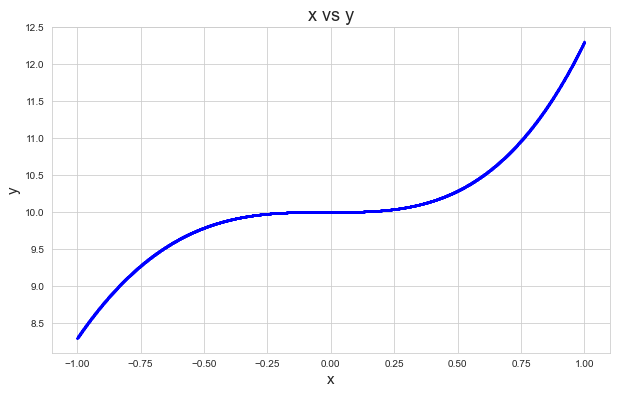

In [20]:
data = get_dataset()

plt.figure(figsize = (10,6))

plt.scatter(data[:,0], data[:,1], s=0.5, c = "blue")
plt.title("x vs y", fontsize = 18)
plt.xlabel ( "x", fontsize= 15 )
plt.ylabel( "y", fontsize = 15 )
plt.show()

# 3.0 Neural Network

## 3.1 Helper Functions

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def get_model(x_train, y_train, x_val, y_val, activation_func= 'reul',structure = 1, epochs = 20, batch_size = 12):
    
    model = Sequential()
    
    if structure == 1:
        
        model.add(Dense(12, activation=activation_func, input_shape = (1,)))
        model.add(Dense(8, activation=activation_func))
        model.add(Dense(4, activation=activation_func))
        
    elif structure == 2:
                  
        model.add(Dense(24, activation=activation_func, input_shape = (1,)))
        
    model.add(Dense(1))
    
    model.compile(optimizer = "adam", loss = "mse")
                  
    model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
        shuffle = False
    )
                  
    return model

## 3.2 Custom Model

In [22]:
def neural_network(argument, scaled, train_ratio, validation_ratio, test_ratio, activation_func, structure, epochs, batch_size):
    
    data = get_dataset(argument)

    x_train, y_train, x_validation, y_validation, x_test, y_test = split_data(data, train_ratio, validation_ratio, test_ratio)

        
    if scaled is True:

        x_train = scale_data(x_train)
        
        y_train = scale_data(y_train)
        
        x_validation = scale_data(x_validation)
        
        y_validation = scale_data(y_validation)
        
        x_test = scale_data(x_test)
        
        y_test = scale_data(y_test)
        
    
    model = get_model(x_train, y_train, x_validation, y_validation, activation_func, structure, epochs, batch_size)

    y_prediction = model.predict(x_test, batch_size = batch_size)
    
    graph_plotter(x_test, y_test, plot_type= "true")
    graph_plotter(x_test, y_prediction, plot_type= "predict")
    
    mae, mse, rmse, r2 = evaluate(y_test, y_prediction)
    
    print("Evaluation of the model:")
    print(f"\tMean Absolute Error: {mae}")
    print(f"\tMean Squared Error: {mse}")
    print(f"\tRoot Mean Squared Error: {rmse}")
    print(f"\tR2 Score: {r2}")

**Case #1:**

– Data: Use shuffled and unscaled data.

– NN structure: Structure 1.

– Activation function: Relu.

shuffling

Epoch 1/20
750/750 [==============================] - 1s 707us/step - loss: 49.1459 - val_loss: 0.2219
Epoch 2/20
750/750 [==============================] - 0s 610us/step - loss: 0.1389 - val_loss: 0.0286
Epoch 3/20
750/750 [==============================] - 0s 597us/step - loss: 0.0220 - val_loss: 0.0066
Epoch 4/20
750/750 [==============================] - 0s 604us/step - loss: 0.0059 - val_loss: 0.0037
Epoch 5/20
750/750 [==============================] - 0s 625us/step - loss: 0.0038 - val_loss: 0.0032
Epoch 6/20
750/750 [==============================] - 0s 596us/step - loss: 0.0033 - val_loss: 0.0029
Epoch 7/20
750/750 [==============================] - 0s 599us/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/20
750/750 [==============================] - 0s 604us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
750/750 [==============================] - 1s 692us/step - loss: 0.0029 - val_loss: 0.0025
Epoch 10/20
750/750 [==============================] - 0s 618us/step -

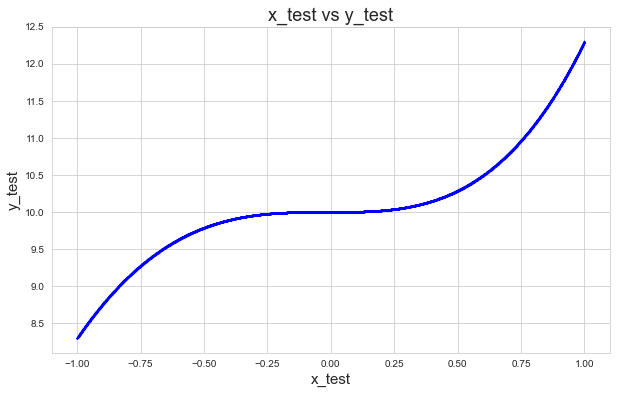

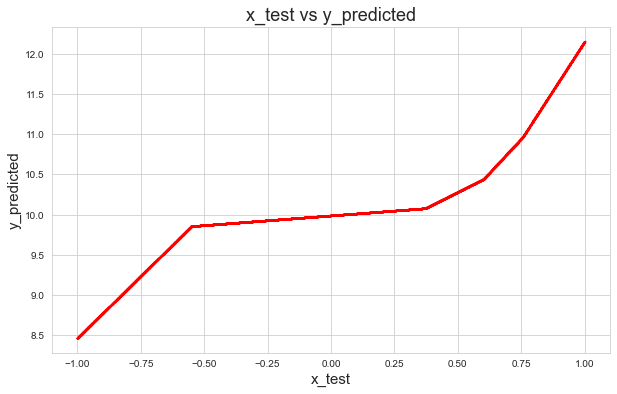

Evaluation of the model:
	Mean Absolute Error: 0.03215842803752418
	Mean Squared Error: 0.0019290685302675746
	Root Mean Squared Error: 0.04392116266980616
	R2 Score: 0.9966192599400538


In [23]:
neural_network(
                argument = "shuffle",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #2:**

– Data: Use shuffled and unscaled data.

– NN structure: Structure 2.

– Activation function: Relu.

shuffling

Epoch 1/20
750/750 [==============================] - 1s 646us/step - loss: 70.9720 - val_loss: 0.2699
Epoch 2/20
750/750 [==============================] - 0s 544us/step - loss: 0.1308 - val_loss: 0.0759
Epoch 3/20
750/750 [==============================] - 0s 550us/step - loss: 0.0715 - val_loss: 0.0541
Epoch 4/20
750/750 [==============================] - 0s 553us/step - loss: 0.0529 - val_loss: 0.0467
Epoch 5/20
750/750 [==============================] - 0s 545us/step - loss: 0.0470 - val_loss: 0.0421
Epoch 6/20
750/750 [==============================] - 0s 585us/step - loss: 0.0405 - val_loss: 0.0295
Epoch 7/20
750/750 [==============================] - 0s 560us/step - loss: 0.0270 - val_loss: 0.0172
Epoch 8/20
750/750 [==============================] - 0s 552us/step - loss: 0.0159 - val_loss: 0.0103
Epoch 9/20
750/750 [==============================] - 0s 544us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 10/20
750/750 [==============================] - 0s 549us/step -

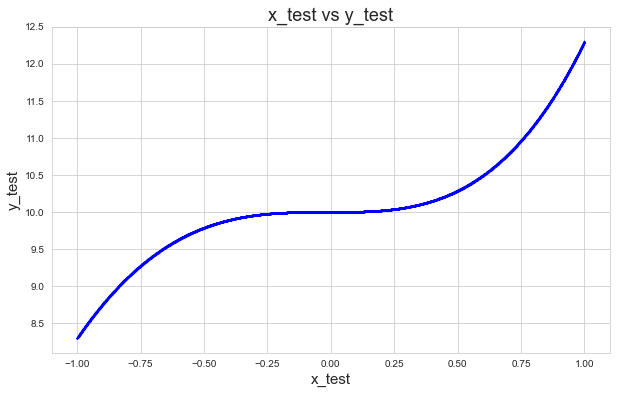

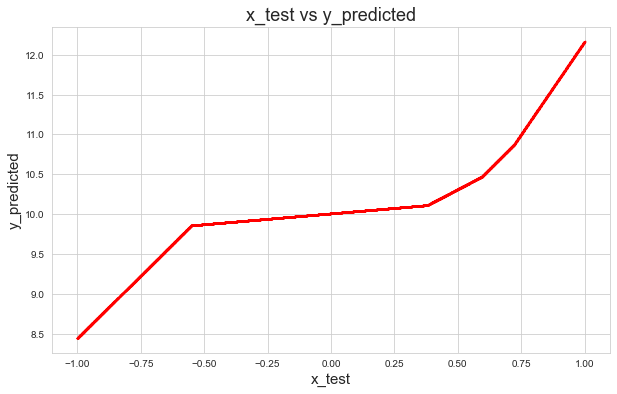

Evaluation of the model:
	Mean Absolute Error: 0.03526445563420699
	Mean Squared Error: 0.0020665980588864376
	Root Mean Squared Error: 0.04545985106537897
	R2 Score: 0.9963782360575261


In [24]:
neural_network(
                argument = "shuffle",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 2,
                epochs= 20,
                batch_size= 12
              )

**Case #3:**

– Data: Use shuffled and unscaled data.

– NN structure: Structure 1.

– Activation function: tanh.

shuffling

Epoch 1/20
750/750 [==============================] - 1s 717us/step - loss: 68.0264 - val_loss: 22.1421
Epoch 2/20
750/750 [==============================] - 0s 578us/step - loss: 16.4699 - val_loss: 5.3086
Epoch 3/20
750/750 [==============================] - 0s 593us/step - loss: 3.7325 - val_loss: 1.1426
Epoch 4/20
750/750 [==============================] - 0s 629us/step - loss: 0.9037 - val_loss: 0.6209
Epoch 5/20
750/750 [==============================] - 0s 578us/step - loss: 0.6016 - val_loss: 0.5948
Epoch 6/20
750/750 [==============================] - 0s 578us/step - loss: 0.5660 - val_loss: 0.3165
Epoch 7/20
750/750 [==============================] - 0s 592us/step - loss: 0.2831 - val_loss: 0.2119
Epoch 8/20
750/750 [==============================] - 0s 584us/step - loss: 0.2017 - val_loss: 0.1702
Epoch 9/20
750/750 [==============================] - 0s 590us/step - loss: 0.1667 - val_loss: 0.1407
Epoch 10/20
750/750 [==============================] - 0s 580us/step

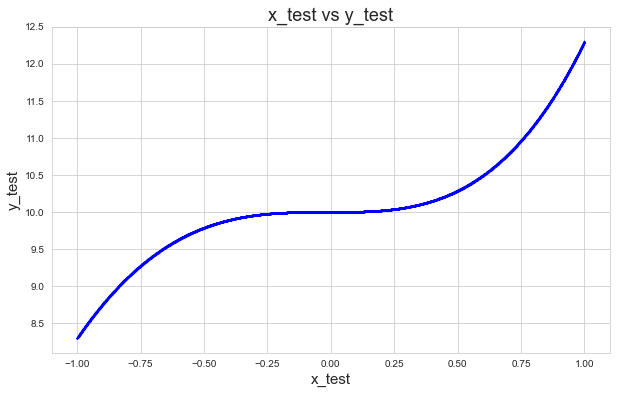

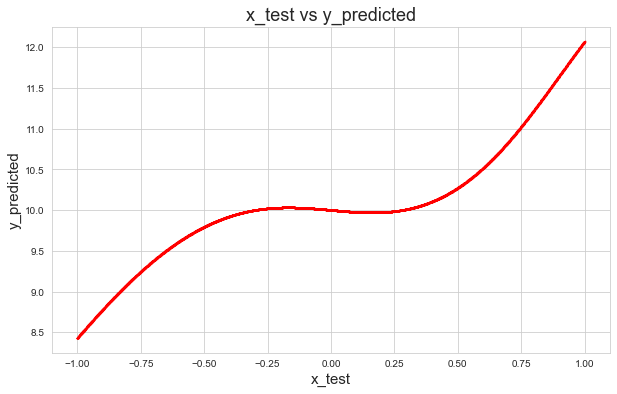

Evaluation of the model:
	Mean Absolute Error: 0.036339829667730195
	Mean Squared Error: 0.0021348778070589096
	Root Mean Squared Error: 0.04620473792868984
	R2 Score: 0.996258574118975


In [25]:
neural_network(
                argument = "shuffle",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "tanh",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #4:**

– Data: Use shuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both x and y).

– NN structure: Structure 1.

– Activation function: Relu

shuffling

Epoch 1/20
750/750 [==============================] - 1s 698us/step - loss: 0.0132 - val_loss: 0.0056
Epoch 2/20
750/750 [==============================] - 0s 594us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 3/20
750/750 [==============================] - 0s 584us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/20
750/750 [==============================] - 0s 588us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 5/20
750/750 [==============================] - 0s 594us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 6/20
750/750 [==============================] - 0s 593us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 7/20
750/750 [==============================] - 0s 584us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/20
750/750 [==============================] - 0s 593us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/20
750/750 [==============================] - 0s 592us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 10/20
750/750 [==============================] - 0s 596us/step - 

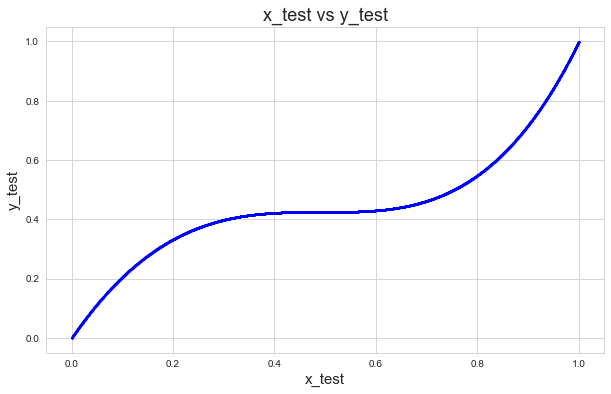

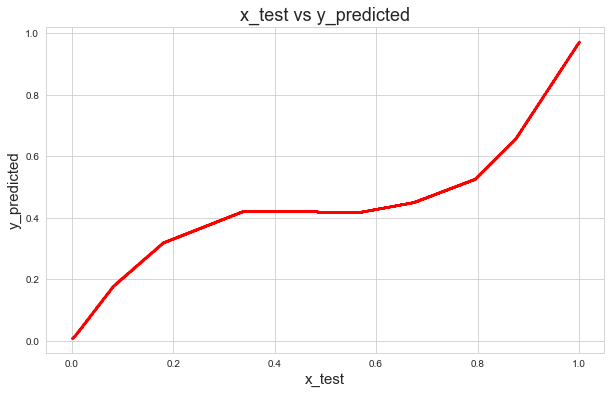

Evaluation of the model:
	Mean Absolute Error: 0.00442934806869167
	Mean Squared Error: 3.0720066512455514e-05
	Root Mean Squared Error: 0.005542568584370924
	R2 Score: 0.9991385972421543


In [27]:
neural_network(
                argument = "shuffle",
                scaled = True,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #5:**

– Data: Use shuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both x and y).

– NN structure: Structure 1.

– Activation function: tanh

shuffling

Epoch 1/20
750/750 [==============================] - 1s 705us/step - loss: 0.0934 - val_loss: 0.0069
Epoch 2/20
750/750 [==============================] - 0s 596us/step - loss: 0.0069 - val_loss: 0.0059
Epoch 3/20
750/750 [==============================] - 0s 601us/step - loss: 0.0052 - val_loss: 0.0019
Epoch 4/20
750/750 [==============================] - 0s 592us/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/20
750/750 [==============================] - 0s 598us/step - loss: 0.0010 - val_loss: 7.8616e-04
Epoch 6/20
750/750 [==============================] - 0s 597us/step - loss: 6.8531e-04 - val_loss: 5.1388e-04
Epoch 7/20
750/750 [==============================] - 0s 586us/step - loss: 5.2000e-04 - val_loss: 3.8691e-04
Epoch 8/20
750/750 [==============================] - 0s 582us/step - loss: 4.2349e-04 - val_loss: 3.5956e-04
Epoch 9/20
750/750 [==============================] - 0s 584us/step - loss: 3.5274e-04 - val_loss: 3.2368e-04
Epoch 10/20
750/750 [==============

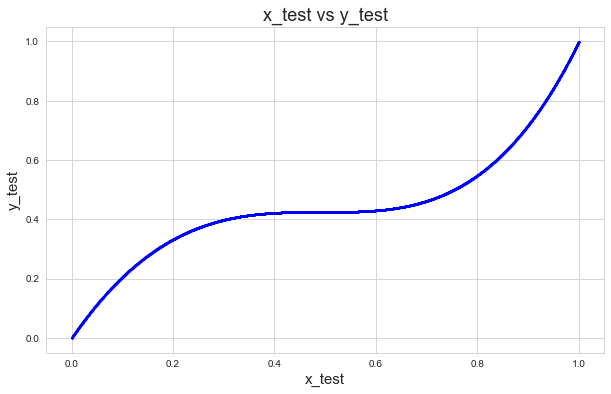

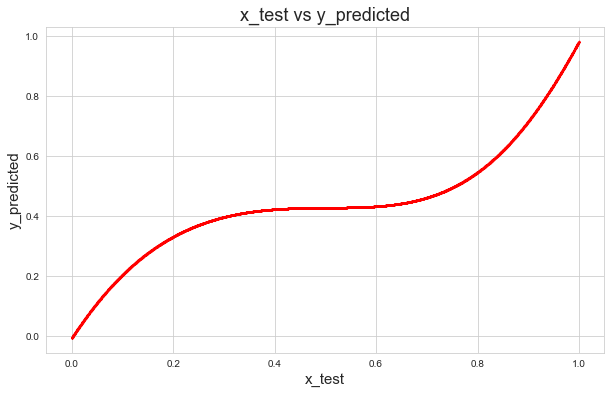

Evaluation of the model:
	Mean Absolute Error: 0.0022959174828029653
	Mean Squared Error: 1.0169178248614659e-05
	Root Mean Squared Error: 0.0031889149014382085
	R2 Score: 0.9997148522388508


In [28]:
neural_network(
                argument = "shuffle",
                scaled = True,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "tanh",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #6:**

– Data: Use unshuffled and unscaled data.

– NN structure: Structure 1.

– Activation function: Relu.

Epoch 1/20
750/750 [==============================] - 1s 701us/step - loss: 38.8932 - val_loss: 3.3802
Epoch 2/20
750/750 [==============================] - 0s 606us/step - loss: 2.5573 - val_loss: 2.9848
Epoch 3/20
750/750 [==============================] - 0s 588us/step - loss: 2.2420 - val_loss: 2.6936
Epoch 4/20
750/750 [==============================] - 0s 586us/step - loss: 2.0130 - val_loss: 2.4443
Epoch 5/20
750/750 [==============================] - 0s 580us/step - loss: 1.8306 - val_loss: 2.2210
Epoch 6/20
750/750 [==============================] - 0s 593us/step - loss: 1.6770 - val_loss: 2.0206
Epoch 7/20
750/750 [==============================] - 0s 584us/step - loss: 1.5439 - val_loss: 1.8402
Epoch 8/20
750/750 [==============================] - 0s 581us/step - loss: 1.4264 - val_loss: 1.6772
Epoch 9/20
750/750 [==============================] - 0s 586us/step - loss: 1.3208 - val_loss: 1.5302
Epoch 10/20
750/750 [==============================] - 0s 597us/step - loss: 1.22

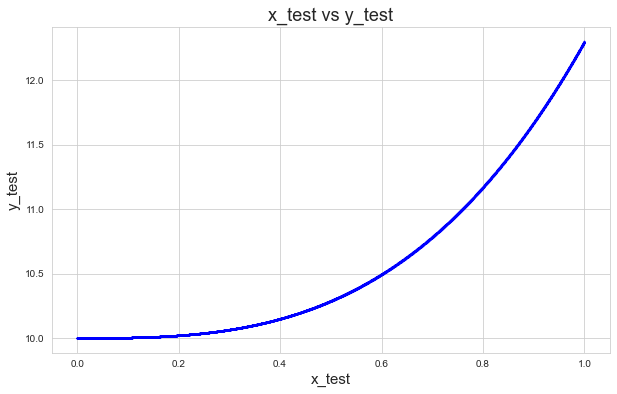

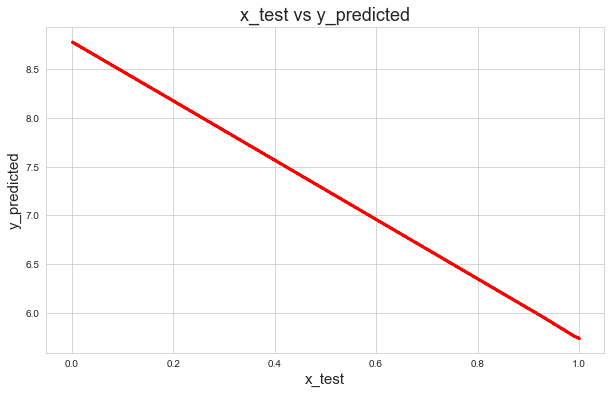

Evaluation of the model:
	Mean Absolute Error: 3.309509017142782
	Mean Squared Error: 13.195731782599058
	Root Mean Squared Error: 3.632592983338356
	R2 Score: -30.297081353556976


In [29]:
neural_network(
                argument = "unshuffled",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #7:**

– Data: Use unshuffled and unscaled data.

– NN structure: Structure 2.

– Activation function: Relu.

Epoch 1/20
750/750 [==============================] - 1s 658us/step - loss: 50.4427 - val_loss: 10.9864
Epoch 2/20
750/750 [==============================] - 0s 560us/step - loss: 1.8214 - val_loss: 4.4045
Epoch 3/20
750/750 [==============================] - 0s 549us/step - loss: 3.7876 - val_loss: 3.5556
Epoch 4/20
750/750 [==============================] - 0s 540us/step - loss: 3.3405 - val_loss: 2.9825
Epoch 5/20
750/750 [==============================] - 0s 538us/step - loss: 2.9301 - val_loss: 2.5506
Epoch 6/20
750/750 [==============================] - 0s 544us/step - loss: 2.5736 - val_loss: 2.2057
Epoch 7/20
750/750 [==============================] - 0s 536us/step - loss: 2.2639 - val_loss: 1.9261
Epoch 8/20
750/750 [==============================] - 0s 527us/step - loss: 1.9906 - val_loss: 1.6905
Epoch 9/20
750/750 [==============================] - 0s 535us/step - loss: 1.7522 - val_loss: 1.4896
Epoch 10/20
750/750 [==============================] - 0s 530us/step - loss: 1.5

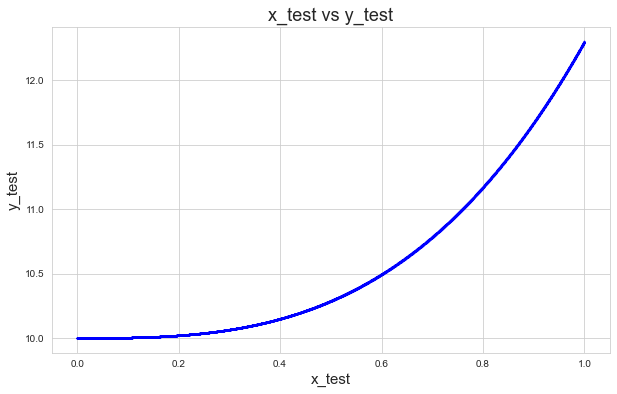

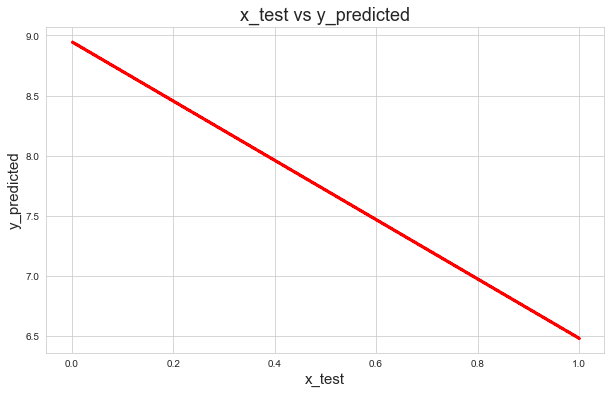

Evaluation of the model:
	Mean Absolute Error: 2.856067888761689
	Mean Squared Error: 9.932390933531828
	Root Mean Squared Error: 3.151569598395667
	R2 Score: -22.55722685209435


In [30]:
neural_network(
                argument = "unshuffled",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 2,
                epochs= 20,
                batch_size= 12
              )

**Case #8:**

– Data: Use unshuffled and unscaled data.

– NN structure: Structure 1.

– Activation function: tanh.

Epoch 1/20
750/750 [==============================] - 1s 710us/step - loss: 41.6626 - val_loss: 16.0314
Epoch 2/20
750/750 [==============================] - 0s 573us/step - loss: 5.5101 - val_loss: 3.2679
Epoch 3/20
750/750 [==============================] - 0s 573us/step - loss: 0.3300 - val_loss: 0.5949
Epoch 4/20
750/750 [==============================] - 0s 581us/step - loss: 0.2528 - val_loss: 0.1929
Epoch 5/20
750/750 [==============================] - 0s 592us/step - loss: 0.4445 - val_loss: 0.1094
Epoch 6/20
750/750 [==============================] - 0s 577us/step - loss: 0.4822 - val_loss: 0.0683
Epoch 7/20
750/750 [==============================] - 0s 581us/step - loss: 0.4835 - val_loss: 0.0447
Epoch 8/20
750/750 [==============================] - 0s 577us/step - loss: 0.4717 - val_loss: 0.0323
Epoch 9/20
750/750 [==============================] - 0s 590us/step - loss: 0.4542 - val_loss: 0.0259
Epoch 10/20
750/750 [==============================] - 0s 586us/step - loss: 0.4

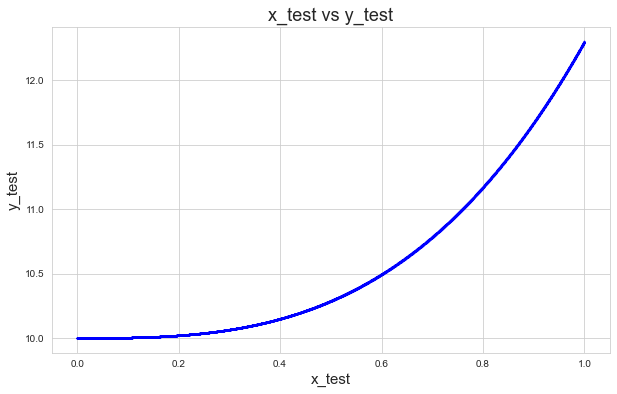

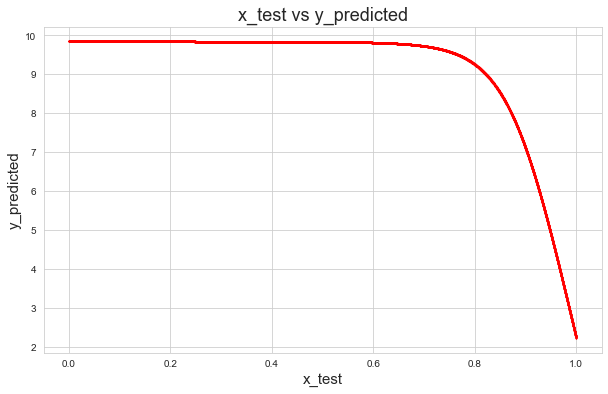

Evaluation of the model:
	Mean Absolute Error: 1.4111826437722939
	Mean Squared Error: 6.6798188966981655
	Root Mean Squared Error: 2.584534560940938
	R2 Score: -14.84291336632587


In [31]:
neural_network(
                argument = "unshuffled",
                scaled = False,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "tanh",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #9:**

– Data: Use unshuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both x and y).

– NN structure: Structure 1.

– Activation function: Relu

Epoch 1/20
750/750 [==============================] - 1s 688us/step - loss: 6.7191e-04 - val_loss: 0.0403
Epoch 2/20
750/750 [==============================] - 0s 592us/step - loss: 0.0440 - val_loss: 0.0360
Epoch 3/20
750/750 [==============================] - 0s 590us/step - loss: 0.0564 - val_loss: 0.0155
Epoch 4/20
750/750 [==============================] - 0s 588us/step - loss: 0.0154 - val_loss: 0.0149
Epoch 5/20
750/750 [==============================] - 0s 593us/step - loss: 0.0049 - val_loss: 0.0175
Epoch 6/20
750/750 [==============================] - 0s 589us/step - loss: 0.0017 - val_loss: 0.0201
Epoch 7/20
750/750 [==============================] - 0s 586us/step - loss: 5.8895e-04 - val_loss: 0.0220
Epoch 8/20
750/750 [==============================] - 0s 601us/step - loss: 2.2461e-04 - val_loss: 0.0222
Epoch 9/20
750/750 [==============================] - 0s 588us/step - loss: 8.9532e-05 - val_loss: 0.0233
Epoch 10/20
750/750 [==============================] - 0s 586us/st

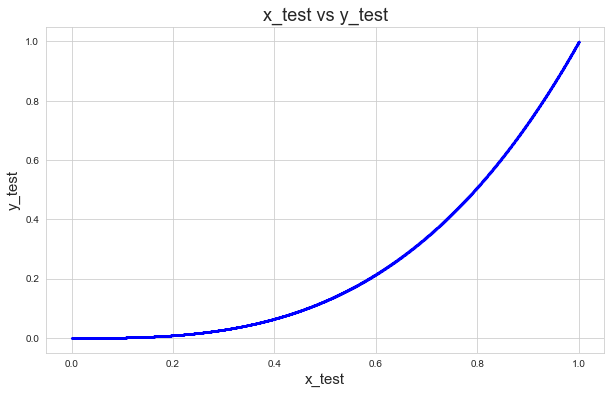

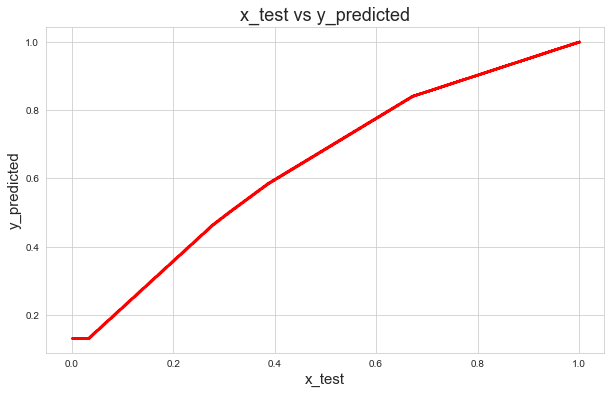

Evaluation of the model:
	Mean Absolute Error: 0.3913377221374829
	Mean Squared Error: 0.1782940579951678
	Root Mean Squared Error: 0.422248810531383
	R2 Score: -1.2369841194199047


In [32]:
neural_network(
                argument = "unshuffled",
                scaled = True,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "relu",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )

**Case #10:**

– Data: Use unshuffled and scaled data. First, shuffle the data then split
the data and finally scale the data (both x and y).

– NN structure: Structure 1.

– Activation function: tanh

Epoch 1/20
750/750 [==============================] - 1s 896us/step - loss: 1.1264e-05 - val_loss: 0.0516
Epoch 2/20
750/750 [==============================] - 0s 586us/step - loss: 1.7471e-05 - val_loss: 0.0352
Epoch 3/20
750/750 [==============================] - 0s 578us/step - loss: 3.5010e-04 - val_loss: 0.0313
Epoch 4/20
750/750 [==============================] - 0s 580us/step - loss: 5.2665e-04 - val_loss: 0.0273
Epoch 5/20
750/750 [==============================] - 0s 580us/step - loss: 6.8478e-04 - val_loss: 0.0205
Epoch 6/20
750/750 [==============================] - 0s 584us/step - loss: 0.0010 - val_loss: 0.0208
Epoch 7/20
750/750 [==============================] - 0s 592us/step - loss: 9.0160e-04 - val_loss: 0.0116
Epoch 8/20
750/750 [==============================] - 0s 582us/step - loss: 0.0011 - val_loss: 0.0108
Epoch 9/20
750/750 [==============================] - 0s 586us/step - loss: 7.2621e-04 - val_loss: 0.0063
Epoch 10/20
750/750 [==============================] -

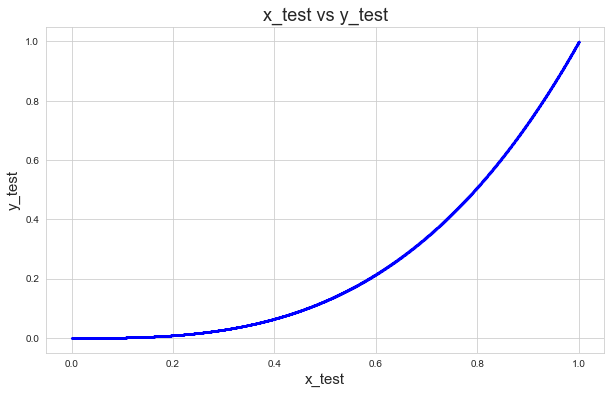

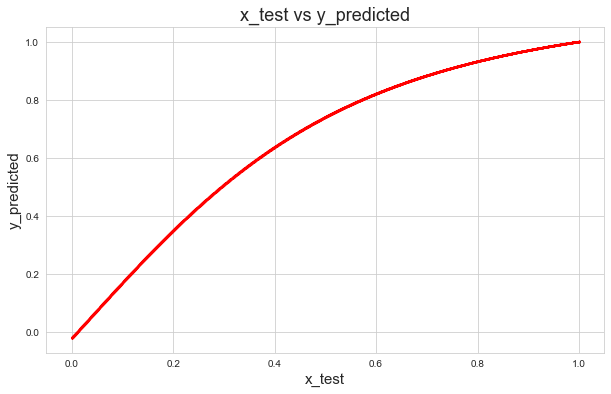

Evaluation of the model:
	Mean Absolute Error: 0.40231784735258225
	Mean Squared Error: 0.19803551990924007
	Root Mean Squared Error: 0.44501181996576233
	R2 Score: -1.4846723334438936


In [33]:
neural_network(
                argument = "unshuffled",
                scaled = True,
                train_ratio = 0.3,
                validation_ratio = 0.2,
                test_ratio= 0.5,
                activation_func= "tanh",
                structure = 1,
                epochs= 20,
                batch_size= 12
              )